In [261]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
import chardet

# Open the file in binary mode to avoid decoding issues
with open('/content/drive/MyDrive/Sentiment_Analysis/Sentiment Analysis for Financial News.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [263]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis/Sentiment Analysis for Financial News.csv',encoding='Windows-1252')
df

,SENTIMENTS,TEXT
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [264]:
df.shape

(4846, 2)

In [265]:
df.info() #No Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SENTIMENTS  4846 non-null   object
 1   TEXT        4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [266]:
df.columns

Index(['SENTIMENTS', 'TEXT'], dtype='object')

In [267]:
value_counts = df['SENTIMENTS'].value_counts()

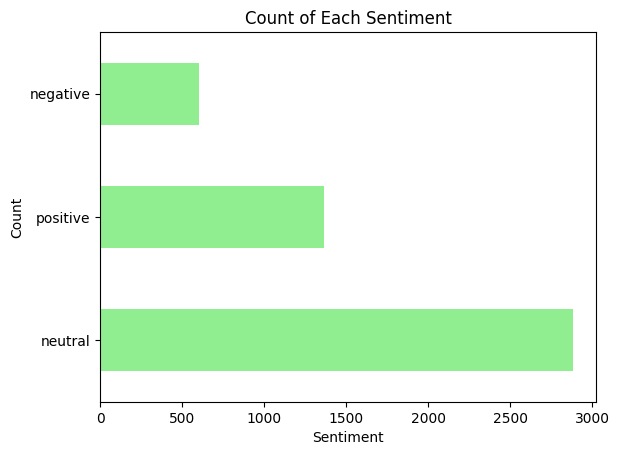

In [268]:
value_counts.plot(kind='barh', color='lightgreen')

# Step 5: Add title and labels
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Step 6: Show plot
plt.show()
#  plot(kind=...) Options in Pandas:
# kind Value	Description	Visualization Type
# 'line'	Line plot (default)	📈 Time series, trends
# 'bar'	Vertical bar chart	📊 Category comparison
# 'barh'	Horizontal bar chart	📊 Category comparison (horizontal)
# 'hist'	Histogram	📉 Distribution
# 'box'	Box plot	📦 Statistical summary
# 'kde' or 'density'	Kernel density estimate plot	🔁 Smoothed distribution
# 'area'	Area plot	🗺 Cumulative trends
# 'pie'	Pie chart	🥧 Proportional data
# 'scatter'	Scatter plot (requires x and y)	⚫ Correlation between two variables
# 'hexbin'	Hexagonal binning plot (2D histogram)	🧩 Dense scatter with bins

In [269]:
df['SENTIMENTS'].value_counts()

,count
SENTIMENTS,
neutral,2879
positive,1363
negative,604


In [270]:
from sklearn.utils import resample

neutral_df = df[df['SENTIMENTS'] == 'neutral']
neutral_downsampled = resample(neutral_df, replace=False, n_samples=1363, random_state=42)

# 2. Negative → oversample to 1200
negative_df = df[df['SENTIMENTS'] == 'negative']
negative_oversampled = resample(negative_df, replace=True, n_samples=1363, random_state=42)

# 3. Positive → as is
positive_df = df[df['SENTIMENTS'] == 'positive']

# Combine all
df_new = pd.concat([neutral_downsampled, negative_oversampled, positive_df])

# Shuffle
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_new.to_csv("balanced_dataset_neutral1500_negative1200.csv", index=False)
df_new


,SENTIMENTS,TEXT
0,neutral,"In beers , Olvi retained its market position ."
1,neutral,"The size of the extension , 18.5 % of which al..."
2,negative,Alma Media 's operating profit amounted to EUR...
3,neutral,"`` In Ukraine , too , we act as a partner for ..."
4,negative,We have also cut our price projections for pap...
...,...,...
4084,neutral,Basware offers full support for all SAP versio...
4085,neutral,Around 50 percent of the world 's ro-ro fleet ...
4086,neutral,So far the company has awarded more than $ 350...
4087,positive,The world 's biggest magazine paper maker said...


In [271]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SENTIMENTS  4089 non-null   object
 1   TEXT        4089 non-null   object
dtypes: object(2)
memory usage: 64.0+ KB


Text(0, 0.5, 'Count')

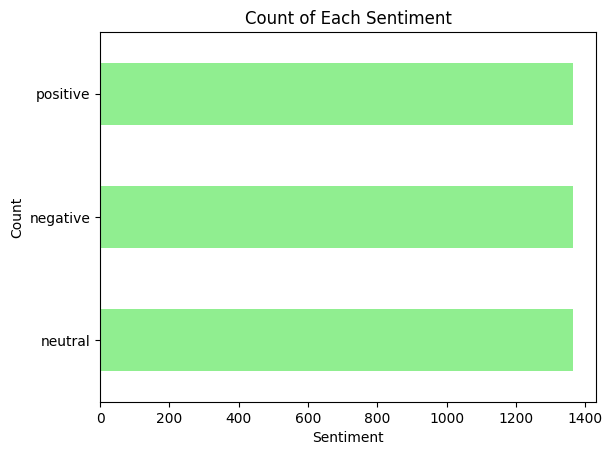

In [272]:
value_counts = df_new['SENTIMENTS'].value_counts()
value_counts.plot(kind='barh', color='lightgreen')

# Step 5: Add title and labels
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')


In [273]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [274]:

def remove_punct(s):
    s2 = ''
    for i in s:
        if i not in string.punctuation:
            s2 += i

    return s2

In [275]:

df_new['TEXT'] = df_new['TEXT'].apply(lambda x:remove_punct(x))
df_new

,SENTIMENTS,TEXT
0,neutral,In beers Olvi retained its market position
1,neutral,The size of the extension 185 of which alrea...
2,negative,Alma Media s operating profit amounted to EUR ...
3,neutral,In Ukraine too we act as a partner for majo...
4,negative,We have also cut our price projections for pap...
...,...,...
4084,neutral,Basware offers full support for all SAP versio...
4085,neutral,Around 50 percent of the world s roro fleet is...
4086,neutral,So far the company has awarded more than 3500...
4087,positive,The world s biggest magazine paper maker said ...


In [276]:
df_new['TEXT'] = df_new['TEXT'].apply(lambda x:x.lower())
df_new.head()

,SENTIMENTS,TEXT
0,neutral,in beers olvi retained its market position
1,neutral,the size of the extension 185 of which alrea...
2,negative,alma media s operating profit amounted to eur ...
3,neutral,in ukraine too we act as a partner for majo...
4,negative,we have also cut our price projections for pap...


In [277]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [278]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [279]:

def remove_stopwords(text):
    filtered_text = ''
    for i in text.split():
        if i not in stop_words:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [280]:
df_new['TEXT'] = df_new['TEXT'].apply(lambda x:remove_stopwords(x))
df_new

,SENTIMENTS,TEXT
0,neutral,beers olvi retained market position
1,neutral,size extension 185 already let gross area 2830...
2,negative,alma media operating profit amounted eur 119 m...
3,neutral,ukraine act partner major bakery clients produ...
4,negative,also cut price projections paper packaging ana...
...,...,...
4084,neutral,basware offers full support sap versions start...
4085,neutral,around 50 percent world roro fleet 25 years ol...
4086,neutral,far company awarded 350000 worth tools materials
4087,positive,world biggest magazine paper maker said progra...


In [281]:
def remove_words_less_than_two_chars(text):
    filtered_text = ''
    for i in text.split():
        if len(i) > 2:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [282]:
df_new['TEXT'] = df_new['TEXT'].apply(lambda x:remove_words_less_than_two_chars(x))
df_new

,SENTIMENTS,TEXT
0,neutral,beers olvi retained market position
1,neutral,size extension 185 already let gross area 2830...
2,negative,alma media operating profit amounted eur 119 e...
3,neutral,ukraine act partner major bakery clients produ...
4,negative,also cut price projections paper packaging ana...
...,...,...
4084,neutral,basware offers full support sap versions start...
4085,neutral,around percent world roro fleet years old need...
4086,neutral,far company awarded 350000 worth tools materials
4087,positive,world biggest magazine paper maker said progra...


In [283]:
import re

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002700-\U000027BF"  # Dingbats
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U00002600-\U000026FF"  # Misc symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           "]+", flags=re.UNICODE)

# Create a new column: True if emoji present, else False
df_new['contains_emoji'] = df_new['TEXT'].apply(lambda x: bool(emoji_pattern.search(x)))

print(df_new['contains_emoji'].value_counts())
#


contains_emoji
False    4089
Name: count, dtype: int64


In [284]:
df_new =df_new.drop('contains_emoji',axis=1)
df_new

,SENTIMENTS,TEXT
0,neutral,beers olvi retained market position
1,neutral,size extension 185 already let gross area 2830...
2,negative,alma media operating profit amounted eur 119 e...
3,neutral,ukraine act partner major bakery clients produ...
4,negative,also cut price projections paper packaging ana...
...,...,...
4084,neutral,basware offers full support sap versions start...
4085,neutral,around percent world roro fleet years old need...
4086,neutral,far company awarded 350000 worth tools materials
4087,positive,world biggest magazine paper maker said progra...


In [285]:

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wnl = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [286]:
def lemmatizing_text(text):
    lemmatized_words = [wnl.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_words)

In [287]:
df_new['TEXT'] = df_new['TEXT'].apply(lemmatizing_text)
df_new

,SENTIMENTS,TEXT
0,neutral,beer olvi retained market position
1,neutral,size extension 185 already let gross area 2830...
2,negative,alma medium operating profit amounted eur 119 ...
3,neutral,ukraine act partner major bakery client produc...
4,negative,also cut price projection paper packaging anal...
...,...,...
4084,neutral,basware offer full support sap version startin...
4085,neutral,around percent world roro fleet year old need ...
4086,neutral,far company awarded 350000 worth tool material
4087,positive,world biggest magazine paper maker said progra...


In [358]:
X = df_new['TEXT']
y = df_new['SENTIMENTS']

In [359]:
X

,TEXT
0,beer olvi retained market position
1,size extension 185 already let gross area 2830...
2,alma medium operating profit amounted eur 119 ...
3,ukraine act partner major bakery client produc...
4,also cut price projection paper packaging anal...
...,...
4084,basware offer full support sap version startin...
4085,around percent world roro fleet year old need ...
4086,far company awarded 350000 worth tool material
4087,world biggest magazine paper maker said progra...


In [360]:
y

,SENTIMENTS
0,neutral
1,neutral
2,negative
3,neutral
4,negative
...,...
4084,neutral
4085,neutral
4086,neutral
4087,positive


In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)  #80 -20 split  / random_state to split data alway same`

In [362]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



In [363]:
X_train.shape,y_train.shape

((3271, 7095), (3271,))

In [364]:
X_test.shape,y_test.shape

((818, 7095), (818,))

In [365]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train,y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [366]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy(accuracy_score):', train_accuracy)
print('Test Accuracy(accuracy_score):', test_accuracy)

print('-------------------------------------------------')

print('Train Accuracy(balanced_accuracy_score):', train_accuracy_balanced)
print('Test Accuracy(balanced_accuracy_score):', test_accuracy_balanced)

Train Accuracy(accuracy_score): 0.9923570773463772
Test Accuracy(accuracy_score): 0.7921760391198044
-------------------------------------------------
Train Accuracy(balanced_accuracy_score): 0.9923594824069698
Test Accuracy(balanced_accuracy_score): 0.7959112461835014


In [303]:
from sklearn.model_selection import GridSearchCV
param_grid = {

       'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2','l1'],
}


# Use built-in scorer string for balanced accuracy
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)

Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Balanced Accuracy: 0.7738278407677234


In [304]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2','l1'],
}

# Use built-in scorer string for balanced accuracy
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best  Accuracy:", grid.best_score_)

Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best  Accuracy: 0.7746868361463222


In [367]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[238,   4,  13],
       [ 17, 222,  59],
       [ 20,  57, 188]])

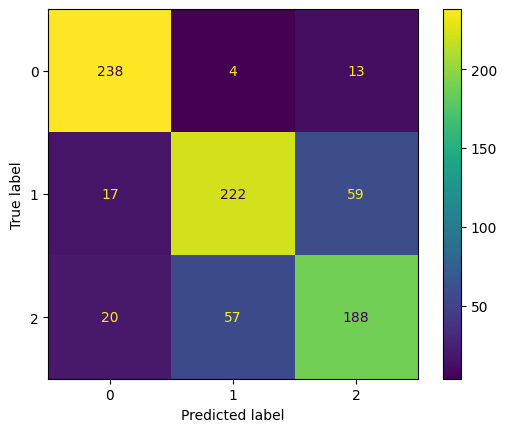

In [368]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [369]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.87      0.93      0.90       255
     neutral       0.78      0.74      0.76       298
    positive       0.72      0.71      0.72       265

    accuracy                           0.79       818
   macro avg       0.79      0.80      0.79       818
weighted avg       0.79      0.79      0.79       818



In [370]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_score_list = []

for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=i,weights="distance")
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([i,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,0.999694,0.687042
1,3,0.999694,0.666259
2,5,0.999694,0.656479
3,7,0.999694,0.663814
4,9,0.999694,0.672372
5,11,0.999694,0.669927
6,13,0.999694,0.667482
7,15,0.999694,0.666259
8,17,0.999694,0.667482
9,19,0.999694,0.663814


In [309]:
accuracy_score_list = []

for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=i,weights="distance")
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([i,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,0.999696,0.682654
1,3,0.999696,0.661090
2,5,0.999696,0.650708
3,7,0.999696,0.656256
4,9,0.999696,0.663520
5,11,0.999696,0.660816
6,13,0.999696,0.658210
7,15,0.999696,0.656436
8,17,0.999696,0.657415
9,19,0.999696,0.653543


In [371]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9,weights="distance")
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [372]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [373]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy(accuracy_score):', train_accuracy)
print('Test Accuracy(accuracy_score):', test_accuracy)

print('-------------------------------------------------')

print('Train Accuracy(balanced_accuracy_score):', train_accuracy_balanced)
print('Test Accuracy(balanced_accuracy_score):', test_accuracy_balanced)

Train Accuracy(accuracy_score): 0.9996942830938551
Test Accuracy(accuracy_score): 0.7958435207823961
-------------------------------------------------
Train Accuracy(balanced_accuracy_score): 0.9996964177292046
Test Accuracy(balanced_accuracy_score): 0.7959732371273612


In [374]:
from sklearn.ensemble import VotingClassifier

In [375]:
voting_clf = VotingClassifier(
    estimators=[('knn', classifier), ('lr', lr),('model',model)],
    voting='soft',# 'hard' for majority voting, 'soft' for predicted probabilities
     weights=[1, 2,3]# give more weight to rf
)

In [376]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=9,
                                                   weights='distance')),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000)),
                             ('model',
                              RandomForestClassifier(class_weight='balanced'))],
                 voting='soft', weights=[1, 2, 3])

In [377]:
y_pred = voting_clf.predict(X_test)
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred))

Voting Ensemble Accuracy: 0.8092909535452323
Voting Ensemble Accuracy: 0.8092909535452323


In [378]:
def proprocess_text(text):
    text = text.lower()
    text = remove_punct(text)
    text = remove_stopwords(text)
    text = remove_words_less_than_two_chars(text)
    text = lemmatizing_text(text)
    # text = spell_correction(text)
    return text

In [379]:
text = "Sensex surges 600 points as markets react positively to RBI's interest rate pause."
text = proprocess_text(text)
text

'sensex surge 600 point market react positively rbi interest rate pause'

In [380]:
arr = vectorizer.transform([text])
pred = voting_clf.predict(arr)
pred

array(['neutral'], dtype=object)

In [381]:
pred = np.max(voting_clf.predict_proba(arr))
pred

np.float64(0.6368324411702021)

In [382]:
import joblib
joblib.dump(voting_clf, 'Sentiment_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']